<a href="https://colab.research.google.com/github/UW-ERSL/TOuNN/blob/main/TOuNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # run this first time to clone the directory 
# !git clone https://github.com/UW-ERSL/TOuNN.git
# %cd TOuNN/

### Imports

In [2]:
import tounn
import numpy as np
import time
from tounn.TOuNNOptimizer import TopologyOptimizer
import matplotlib.pyplot as plt

### Mesh 

In [3]:
nelx = 180; # number of FE elements along X
nely = 60; # number of FE elements along Y
elemSize = np.array([1.0,1.0]);
mesh = {'nelx':nelx, 'nely':nely, 'elemSize':elemSize};

### Material

In [4]:
matProp = {'E':1.0, 'nu':0.3}; # Structural
matProp['penal'] = 1.0; # SIMP penalization constant, starting value

### Boundary Condition

In [5]:
exampleName = 'TipCantilever'
physics = 'Structural'
ndof = 2*(nelx+1)*(nely+1);
force = np.zeros((ndof,1))
dofs=np.arange(ndof);
fixed = dofs[0:2*(nely+1):1];
force[2*(nelx+1)*(nely+1)-2*nely+1, 0 ] = -1;
symXAxis = {'isOn':False, 'midPt':0.5*nely};
symYAxis = {'isOn':False, 'midPt':0.5*nelx};
bc = {'exampleName':exampleName, 'physics':physics, \
      'force':force, 'fixed':fixed, 'symXAxis':symXAxis, 'symYAxis':symYAxis };

# For more BCs see examples.py

### NN Settings

In [6]:
nnSettings = {'numLayers':3, 'numNeuronsPerLyr':20 }

### Constraints and Projections

In [7]:
densityProjection = {'isOn':True, 'sharpness':8};
desiredVolumeFraction = 0.2;

### Optimizer settings

In [8]:
minEpochs = 150; # minimum number of iterations
maxEpochs = 500; # Max number of iterations

/home/ab/anaconda3/envs/porous/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Running on CPU


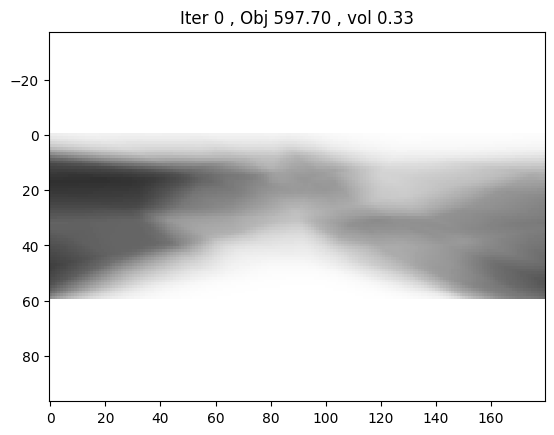

Iter 0 , Obj 597.70 , vol 0.33


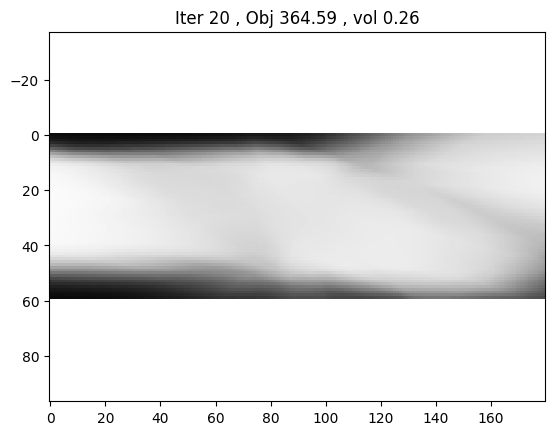

Iter 20 , Obj 364.59 , vol 0.26


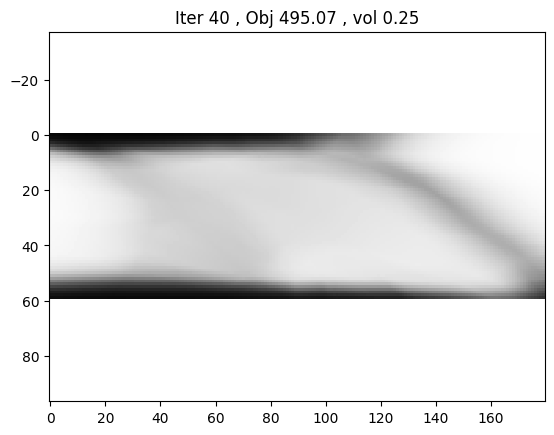

Iter 40 , Obj 495.07 , vol 0.25


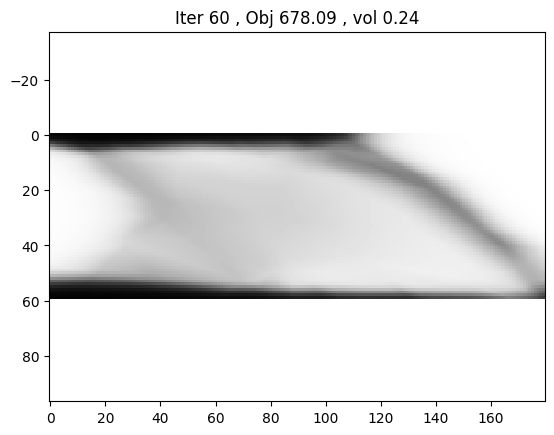

Iter 60 , Obj 678.09 , vol 0.24


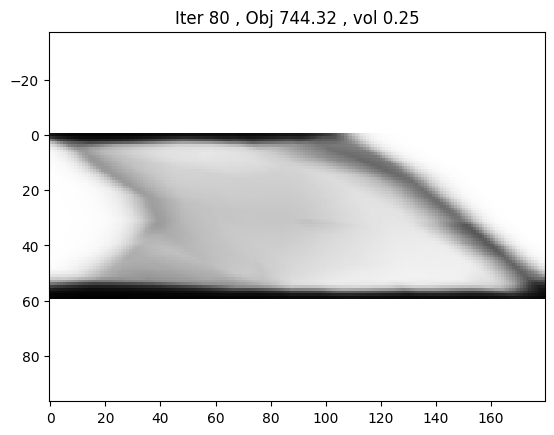

Iter 80 , Obj 744.32 , vol 0.25


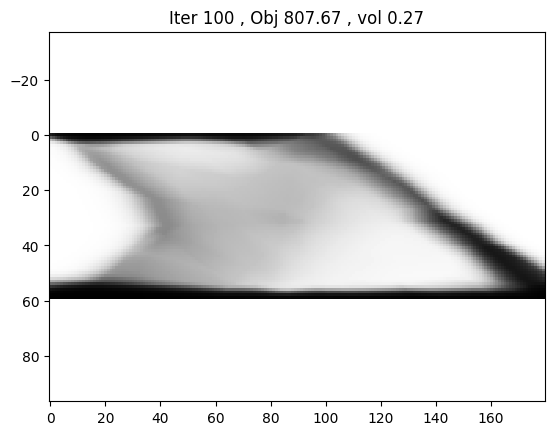

Iter 100 , Obj 807.67 , vol 0.27


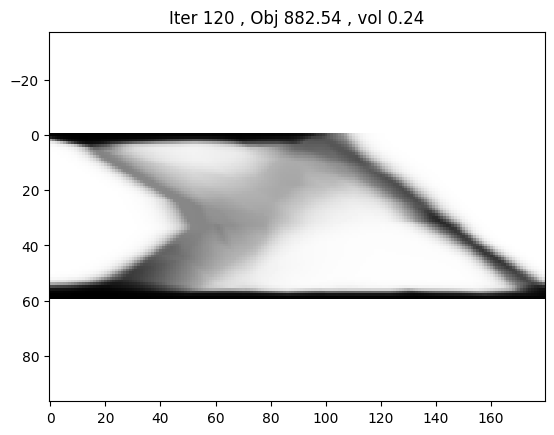

Iter 120 , Obj 882.54 , vol 0.24


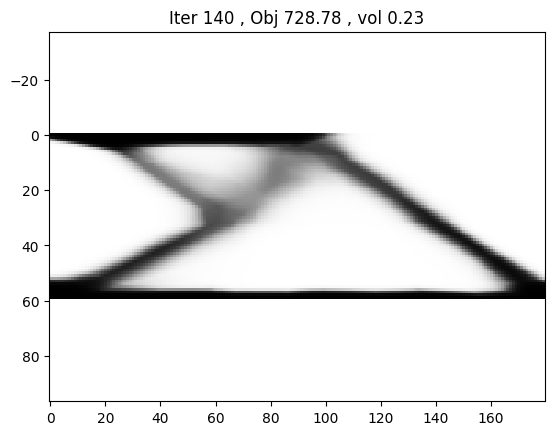

Iter 140 , Obj 728.78 , vol 0.23


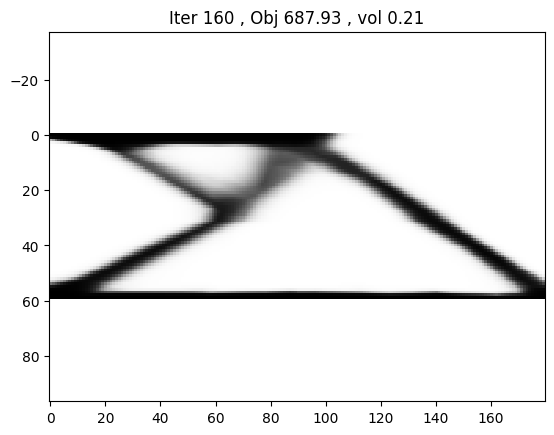

Iter 160 , Obj 687.93 , vol 0.21


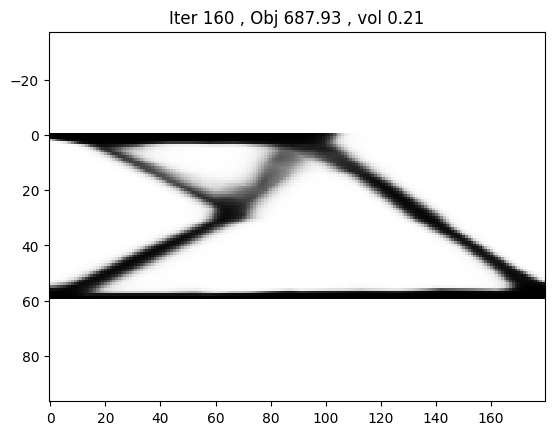

170 J: 660.78; Vf: 0.203; loss: 1.108; relGreyElems: 0.025 
Final J : 660.782


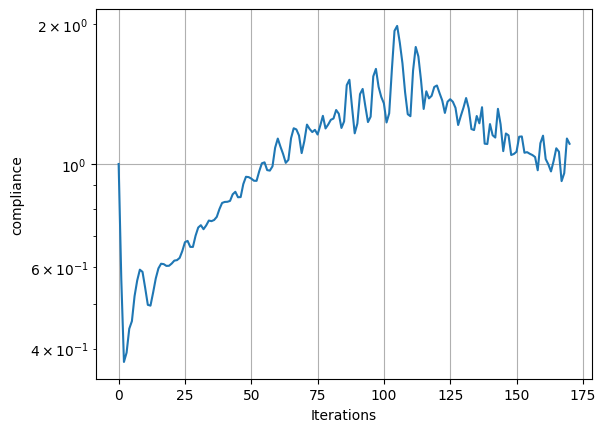

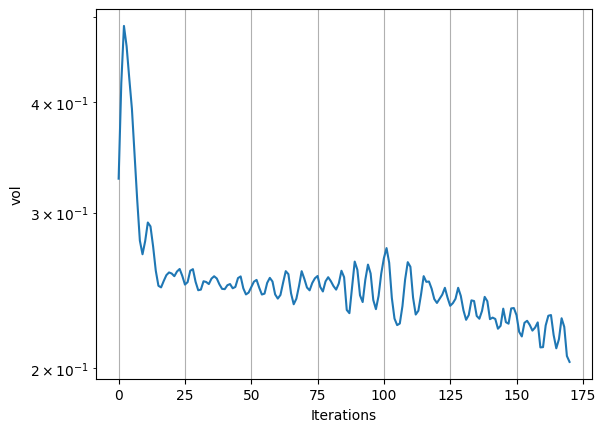

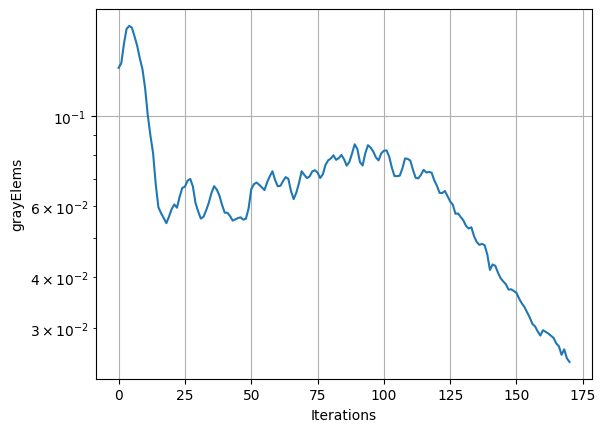

<Figure size 640x480 with 0 Axes>

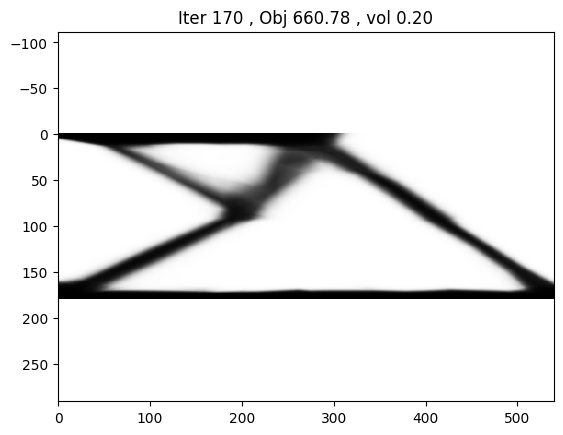

Time taken (secs): 16.31


In [9]:
plt.close('all');
overrideGPU = False
start = time.perf_counter()
topOpt = TopologyOptimizer(mesh, matProp, bc, nnSettings, \
                  desiredVolumeFraction, densityProjection, overrideGPU);
topOpt.optimizeDesign(maxEpochs,minEpochs);
print("Time taken (secs): {:.2F}".format( time.perf_counter() - start))